## ANLP Assignment 2: Natural Language Generation Code
### Christopher Hamilton,  a1766121

In [1]:
import json
import os

import pandas as pd
import numpy as np

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            # Load each line of the JSON file as a dictionary
            data.append(json.loads(line))

    # Form a Pandas DataFrame from the dictionaries
    return pd.json_normalize(data)

# Load the training and test data
raw_train_df = read_json_to_df("hotel_reviews_train.json")
raw_test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
# Print out the initially loaded dataframes
raw_train_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“Horrible experience”,First of all we got there and they didn't have...,September 2012,80138,0,"September 19, 2012",140716137,False,1.0,2.0,...,1.0,Kh3RD,1.0,AB404BB664D653ECF79DE0E0867F6D34,"Las Vegas, Nevada",NaN,NaN,NaN,NaN,NaN
1,“Stay Away”,Found Racist graffiti in the room. Request to ...,June 2011,240151,1,"June 27, 2011",114807323,False,1.0,1.0,...,NaN,TheUglyPhotographer,4.0,BB116F87FE8F9AB356F63853BFD32FFE,"Oceanside, California",3.0,4.0,4.0,NaN,NaN
2,“Great location and service”,Close to Union Square - hotel is a bit of a ma...,October 2010,80793,0,"October 25, 2010",84805430,False,4.0,5.0,...,4.0,Moonstonemoclips,48.0,F3D0CF371B788300E73A1413B2DABB4B,Kirkland,31.0,27.0,32.0,NaN,NaN
3,“I will never go back here again!”,I had a bad vibe about this place from the mom...,June 2012,111418,1,"June 28, 2012",132971117,False,3.0,2.0,...,1.0,JoanellenJ,22.0,BC6BC07F81B768F78B6CE17A18762C11,New York,10.0,9.0,5.0,NaN,NaN
4,“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...",January 2012,671150,3,"February 4, 2012",124104157,False,NaN,NaN,...,NaN,Lynnworks,3.0,F7E9D044FA2554FD06A871289312E043,Providence,3.0,7.0,3.0,NaN,NaN


In [4]:
raw_test_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“I was SO surprised! I WILL return!”,My husband and I just celebrated our 25th wedd...,November 2011,1783324,1,"November 26, 2011",121063682,False,5.0,5.0,...,5.0,shooflyfarm,15.0,12.0,30.0,11.0,02C39D355EE31BFA82F2724523782A92,"Opelika, Alabama",NaN,NaN
1,“A Mother/Daughter vacation”,I could not leave a bad comment on any part of...,August 2011,88458,0,"August 10, 2011",116545869,False,5.0,5.0,...,NaN,bestmpm,NaN,NaN,1.0,NaN,8F37B44FE89FD626313A7CB4B381FE40,Chattanooga,NaN,NaN
2,“Good Choice for Pre-cruise”,I spent one night at this hotel prior to a cru...,November 2010,82868,0,"December 6, 2010",89196759,False,5.0,5.0,...,5.0,Conner2dood,20.0,39.0,26.0,24.0,5E57B2B21C69F07E617D67C748DF010A,Pennsylvania,NaN,NaN
3,“Unsung Hero”,"For the past year and a half, my daughter has ...",July 2011,98979,0,"July 28, 2011",115879719,False,5.0,5.0,...,NaN,LeviK,2.0,NaN,2.0,NaN,D7E5C22B3A877DEA1434B18E797FEE19,,NaN,NaN
4,"“Great Value for a King, Queen, and Princesses.”","Great Value for a King, Queen, and Princesses....",March 2007,112273,8,"March 21, 2007",7198417,False,5.0,5.0,...,5.0,thomrho,13.0,25.0,27.0,4.0,EEE6C615C8EBCA4AFD2774810E590274,"albuquerque, nm",5.0,5.0


In [5]:
ratings_columns = [col for col in raw_train_df.columns if col.startswith("ratings.")]

# Select the title, text and overall rating columns to make a new dataframe
train_df = raw_train_df[["title", "text", "id"] + ratings_columns]
test_df = raw_test_df[["title", "text", "id"] + ratings_columns]

# Check the value counts for the ratings
for dataset in [train_df, test_df]:
    for column in ratings_columns:
        print(dataset[column].value_counts())
        print()

    print()

ratings.service
5.0    11130
4.0     5289
3.0     2677
1.0     1341
2.0     1113
Name: count, dtype: int64

ratings.cleanliness
5.0    11814
4.0     5560
3.0     2373
2.0      901
1.0      897
Name: count, dtype: int64

ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64

ratings.value
5.0    8828
4.0    6312
3.0    3603
2.0    1420
1.0    1384
Name: count, dtype: int64

ratings.location
5.0    11743
4.0     4523
3.0     1875
2.0      504
1.0      338
Name: count, dtype: int64

ratings.sleep_quality
5.0    7167
4.0    3898
3.0    1811
1.0     671
2.0     638
Name: count, dtype: int64

ratings.rooms
5.0    8116
4.0    6142
3.0    3330
2.0    1316
1.0    1096
Name: count, dtype: int64

ratings.check_in_front_desk
5.0    1323
4.0     694
3.0     486
2.0     221
1.0     185
Name: count, dtype: int64

ratings.business_service_(e_g_internet_access)
5.0    643
3.0    503
4.0    491
2.0    164
1.0    158
Name: count, dtype: int64


ratings.serv

In [6]:
# Find indices of rows where the rating is 0
zero_rating_indices = test_df[test_df['ratings.overall'] == 0].index
for index in zero_rating_indices:
    # Print the text corresponding to the zero rating
    print(test_df['text'][index])

Best location. Right where Pier 39 is. Lots of things to do around the area, restaurants and sight seeing. Staff are friendly. Great service. Will come back again :)


In [7]:
# Based on the above text, it is unlikely the reviewer meant to give a low rating
# Instead, we will remvoe the 0 from the dataset
test_df = test_df.drop(zero_rating_indices)

In [8]:
# Check the value counts for the ratings after the 0 rating has been removed
print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
Name: count, dtype: int64


Python's lambda functions can be used to remove the special characters from the dataset. Pandas DataFrames columns include an `apply` method that can take in a lambda function to apply to each cell in the column. By including a lambda function that will only include characters which are alphanumeric or spaces, the special characters can be removed from the dataset (Saturn Cloud 2024).

At the same time, we can apply the `lower()` function on each character to convert all the text to lowercase. This can be seen by viewing the first few rows with the `head()` function on the DataFrames.

In [9]:
# Remove remove non-alphanumeric characters from the title and text columns
train_df.loc[:, 'title'] = train_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
train_df.loc[:, 'text'] = train_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

test_df.loc[:, 'title'] = test_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

In [10]:
train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,horrible experience,first of all we got there and they didnt have ...,140716137,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN,NaN
1,stay away,found racist graffiti in the room request to c...,114807323,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
2,great location and service,close to union square hotel is a bit of a maz...,84805430,4.0,5.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN
3,i will never go back here again,i had a bad vibe about this place from the mom...,132971117,3.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,NaN
4,ripped off our visa card after departure,after we received our final bill and left the ...,124104157,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,i was so surprised i will return,my husband and i just celebrated our 25th wedd...,121063682,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,a motherdaughter vacation,i could not leave a bad comment on any part of...,116545869,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
2,good choice for precruise,i spent one night at this hotel prior to a cru...,89196759,5.0,5.0,4.0,5.0,4.0,5.0,5.0,NaN,NaN
3,unsung hero,for the past year and a half my daughter has b...,115879719,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
4,great value for a king queen and princesses,great value for a king queen and princesses we...,7198417,5.0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,5.0


The provided code for the `language_filter.py` file includes an example of using the `langdetect` Python package to filter for only English text. Rather than applying the filter for only English reviews when reading the file, we can apply the filter on the loaded DataFrames using a similar method to above. By using the Pandas `apply` method on the text and title columns, the returned DataFrame will only include rows where both the title and text are in English as determined by the `langdetect` package.

In [12]:
from langdetect import detect as detect_language

def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    # Filter the DataFrame for reviews where both title and text are in English
    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

Since the language detecting process takes some time over the whole dataset, to save time during development, the filtered DataFrames can be saved and loaded from CSV. Since these DataFrames will not change, and all preprocessing steps are the same, running the language filter each time is not necessary. I have written some quick checks to see if the files have already been saved, and if they have load them, otherwise run the language check code and save the files for later.

In [13]:
# Save the English reviews to a CSV file to save time filtering when running again (NumFOCUS, Inc. 2024)
if os.path.exists("english_hotel_reviews_train.csv"):
    train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    train_df = filter_english_reviews(train_df)
    train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    test_df = filter_english_reviews(test_df)
    test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [14]:
print(raw_train_df.info())
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           24000 non-null  object 
 1   text                                            24000 non-null  object 
 2   date_stayed                                     23050 non-null  object 
 3   offering_id                                     24000 non-null  int64  
 4   num_helpful_votes                               24000 non-null  int64  
 5   date                                            24000 non-null  object 
 6   id                                              24000 non-null  int64  
 7   via_mobile                                      24000 non-null  bool   
 8   ratings.service                                 21550 non-null  float64
 9   ratings.cleanliness                    

In [15]:
print(raw_test_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           6000 non-null   object 
 1   text                                            6000 non-null   object 
 2   date_stayed                                     5756 non-null   object 
 3   offering_id                                     6000 non-null   int64  
 4   num_helpful_votes                               6000 non-null   int64  
 5   date                                            6000 non-null   object 
 6   id                                              6000 non-null   int64  
 7   via_mobile                                      6000 non-null   bool   
 8   ratings.service                                 5351 non-null   float64
 9   ratings.cleanliness                      

### 2. Exploratory Data Analysis (EDA)

In [16]:
print(ratings_columns)

['ratings.service', 'ratings.cleanliness', 'ratings.overall', 'ratings.value', 'ratings.location', 'ratings.sleep_quality', 'ratings.rooms', 'ratings.check_in_front_desk', 'ratings.business_service_(e_g_internet_access)']


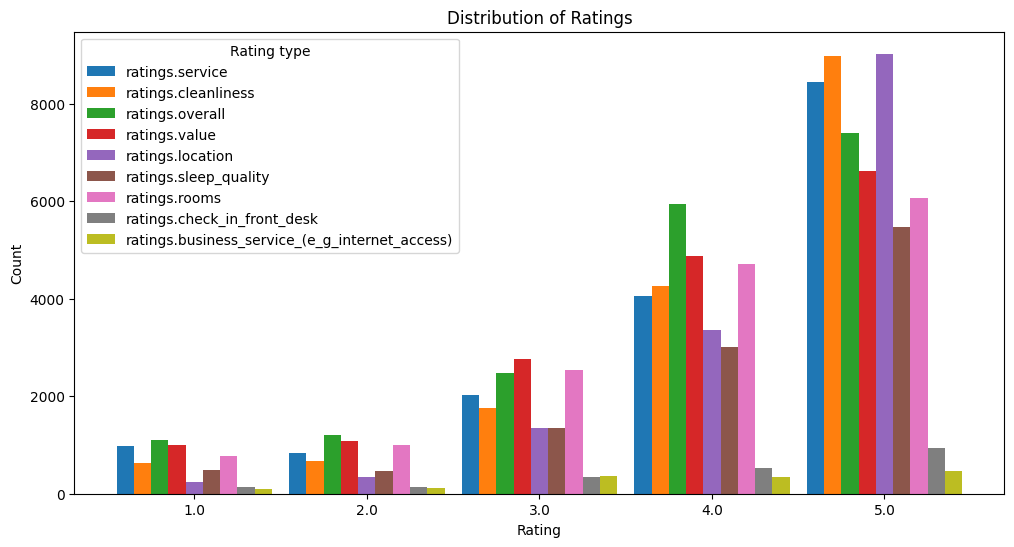

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

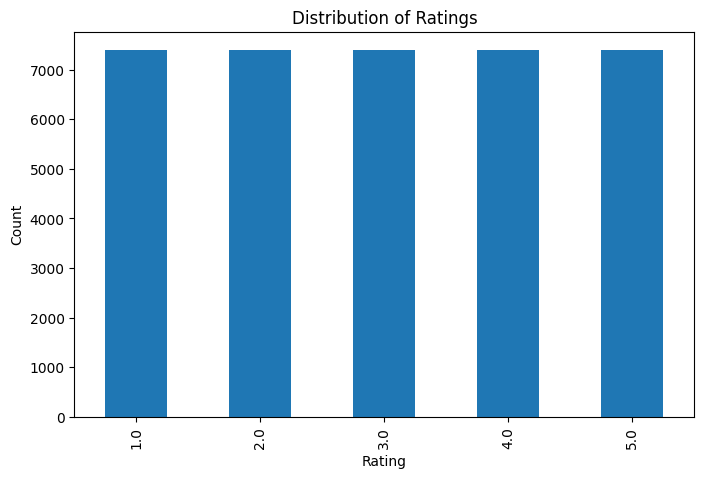

In [18]:
# Balance the training data by oversampling
def balance_data_oversample(df):
    max_count = df['ratings.overall'].value_counts().max()
    balanced_df = pd.DataFrame()

    for rating in df['ratings.overall'].unique():
        rating_df = df[df['ratings.overall'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(max_count, replace=True)])

    return balanced_df
balanced_train_df = balance_data_oversample(train_df)

# Plot distribution of ratings
balanced_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

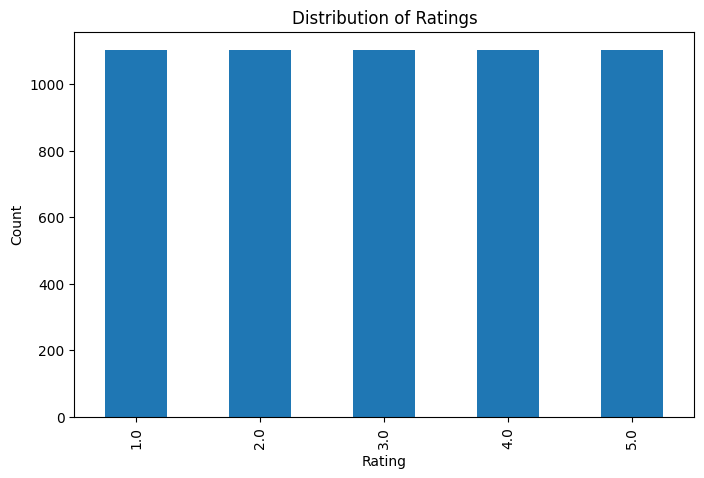

In [19]:
# Balance the training data by undersampling
def balance_data_undersample(df):
    min_count = df['ratings.overall'].value_counts().min()
    balanced_df = pd.DataFrame()

    for rating in df['ratings.overall'].unique():
        rating_df = df[df['ratings.overall'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(min_count, replace=False)])

    return balanced_df

balanced_train_df = balance_data_undersample(train_df)

# Plot distribution of ratings
balanced_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

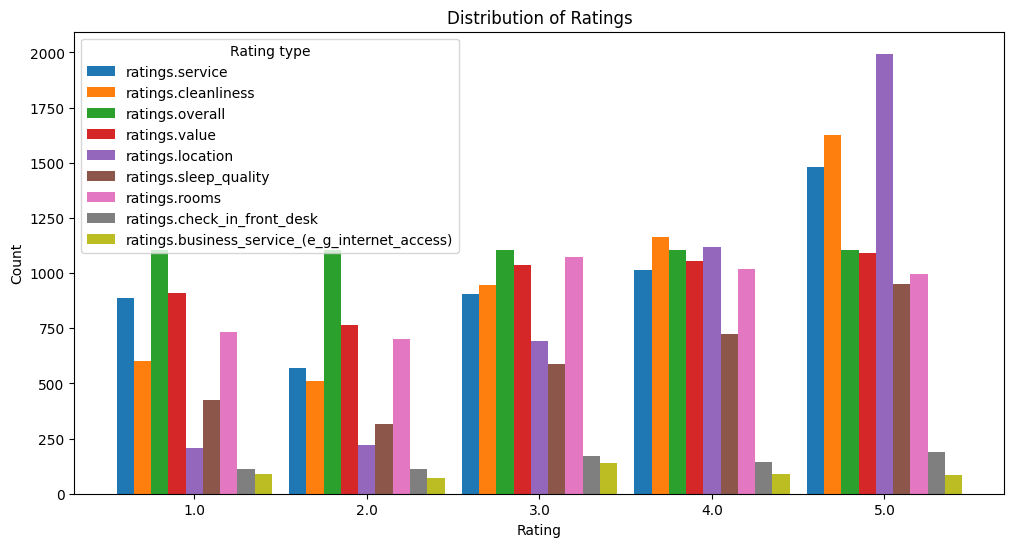

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: balanced_train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

In [21]:
balanced_train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
19,historic hotelgreat location,this was a very nice hotel the staff was court...,49483699,4.0,5.0,4.0,3.0,5.0,NaN,4.0,NaN,NaN
12268,top shelf garden inn,i am a frequent hilton guest and have found th...,131303669,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
58,lovely hotel in just the most perfect location,when i read the other reviews i was a bit skep...,138928432,5.0,5.0,4.0,5.0,4.0,4.0,4.0,NaN,NaN
8761,comfortable hotel in convenient location,my husband teenage daughter and i recently sta...,75850853,5.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN,NaN
1271,a fun stylish and enjoyable place to stay,the standard new york manages to distort reali...,134339719,3.0,4.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN


In [22]:
for column in ratings_columns:
    print(f"NA in {column}: {balanced_train_df[column].isna().sum()}")

NA in ratings.service: 655
NA in ratings.cleanliness: 672
NA in ratings.overall: 0
NA in ratings.value: 653
NA in ratings.location: 1288
NA in ratings.sleep_quality: 2512
NA in ratings.rooms: 994
NA in ratings.check_in_front_desk: 4782
NA in ratings.business_service_(e_g_internet_access): 5042


In [23]:
# Replae the NA review numbers with 0 to indicate they are not used in the review
balanced_train_df = balanced_train_df.fillna(0)
test_df = test_df.fillna(0)

In [24]:
balanced_train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
19,historic hotelgreat location,this was a very nice hotel the staff was court...,49483699,4.0,5.0,4.0,3.0,5.0,0.0,4.0,0.0,0.0
12268,top shelf garden inn,i am a frequent hilton guest and have found th...,131303669,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0
58,lovely hotel in just the most perfect location,when i read the other reviews i was a bit skep...,138928432,5.0,5.0,4.0,5.0,4.0,4.0,4.0,0.0,0.0
8761,comfortable hotel in convenient location,my husband teenage daughter and i recently sta...,75850853,5.0,5.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0
1271,a fun stylish and enjoyable place to stay,the standard new york manages to distort reali...,134339719,3.0,4.0,4.0,4.0,5.0,4.0,4.0,0.0,0.0


In [25]:
inputs = balanced_train_df[ratings_columns]
outputs = balanced_train_df['text']

inputs_test = test_df[ratings_columns]
outputs_test = test_df['text']

In [26]:
inputs.head()

,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
19,4.0,5.0,4.0,3.0,5.0,0.0,4.0,0.0,0.0
12268,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0
58,5.0,5.0,4.0,5.0,4.0,4.0,4.0,0.0,0.0
8761,5.0,5.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0
1271,3.0,4.0,4.0,4.0,5.0,4.0,4.0,0.0,0.0


In [27]:
outputs.head()

19       this was a very nice hotel the staff was court...
12268    i am a frequent hilton guest and have found th...
58       when i read the other reviews i was a bit skep...
8761     my husband teenage daughter and i recently sta...
1271     the standard new york manages to distort reali...
Name: text, dtype: object

In [28]:
from math import ceil
average_sequence_length = int(ceil(balanced_train_df['text'].apply(lambda text: text.split(' ')).apply(len).mean()))

## Model

In [29]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=(6.5 * 1024))])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

2025-05-30 21:19:27.999581: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 21:19:28.008716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748605768.018090   84739 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748605768.021371   84739 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748605768.029910   84739 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1748605769.468260   84739 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6656 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [30]:
def format_input(rating) -> str:
    input = "Generate a hotel review based on the following ratings:\n"
    service = rating.iloc[0]
    cleanliness = rating.iloc[1]
    overall = rating.iloc[2]
    value = rating.iloc[3]
    location = rating.iloc[4]
    sleep_quality = rating.iloc[5]
    rooms = rating.iloc[6]
    check_in_front_desk = rating.iloc[7]
    business_service = rating.iloc[8]

    if service:
      input += f"- service: {service}\n"
    if cleanliness:
      input += f"- cleanliness: {cleanliness}\n"
    if overall:
      input += f"- overall: {overall}\n"
    if value:
      input += f"- value: {value}\n"
    if location:
      input += f"- location: {location}\n"
    if sleep_quality:
      input += f"- sleep quality: {sleep_quality}\n"
    if rooms:
      input += f"- rooms: {rooms}\n"
    if check_in_front_desk:
      input += f"- check in: {check_in_front_desk}\n"
    if business_service:
      input += f"- business service: {business_service}\n"

    return input

In [31]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, BartForConditionalGeneration
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import Dataset

from math import ceil

dataset = Dataset.from_dict({"ratings": inputs.apply(format_input, axis=1).to_list(), "review_text": outputs.to_list()})
test_dataset = Dataset.from_dict({"ratings": inputs_test.apply(format_input, axis=1).to_list(), "review_text": outputs_test.to_list()})

dataset = dataset.shuffle()

# Preprocessing function for dataset
def preprocess(tokeniser, examples):
    model_inputs = tokeniser(examples["ratings"], truncation=True, padding="max_length", max_length=30)
    labels = tokeniser(examples["review_text"], truncation=True, padding="max_length", max_length=ceil(average_sequence_length))
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [32]:
def generate_review(ratings_str, model, tokeniser):
    device = model.device
    inputs = tokeniser(ratings_str, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=average_sequence_length)
    return tokeniser.decode(output[0], skip_special_tokens=True)

In [33]:
models = [
    {'name': 't5', 'model': T5ForConditionalGeneration.from_pretrained('t5-small'), 'tokeniser': AutoTokenizer.from_pretrained('t5-small')},
    {'name': 'bart', 'model': BartForConditionalGeneration.from_pretrained('facebook/bart-base'), 'tokeniser': AutoTokenizer.from_pretrained('facebook/bart-base')},
]

In [34]:
for model_definition in models:
    print(f"Model is {model_definition['name']}")
    
    model = model_definition['model']
    tokeniser = model_definition['tokeniser']

    from evaluate import load

    from rouge import Rouge
    from statistics import mean
    rouge = Rouge()
    
    generated_reviews = []
    reference_reviews = []
    
    for example in test_dataset:
        generated_review = generate_review(example["ratings"], model, tokeniser)
    
        generated_reviews.append(generated_review)
        reference_reviews.append(example["review_text"])
    
    # Evaluate the summaries using the ROUGE metric
    rouge_scores = rouge.get_scores(generated_reviews, reference_reviews)
    rouge_1_ps = []
    rouge_1_rs = []
    rouge_1_fs = []
    
    rouge_2_ps = []
    rouge_2_rs = []
    rouge_2_fs = []
    
    rouge_l_ps = []
    rouge_l_rs = []
    rouge_l_fs = []
    for score in rouge_scores:
        rouge_1_ps.append(score['rouge-1']['p'])
        rouge_1_rs.append(score['rouge-1']['r'])
        rouge_1_fs.append(score['rouge-1']['f'])
    
        rouge_2_ps.append(score['rouge-2']['p'])
        rouge_2_rs.append(score['rouge-2']['r'])
        rouge_2_fs.append(score['rouge-2']['f'])
    
        rouge_l_ps.append(score['rouge-l']['p'])
        rouge_l_rs.append(score['rouge-l']['r'])
        rouge_l_fs.append(score['rouge-l']['f'])
    
    print(f"ROUGE-1 Precision: {mean(rouge_1_ps)}")
    print(f"ROUGE-1 Recall: {mean(rouge_1_rs)}")
    print(f"ROUGE-1 F1: {mean(rouge_1_fs)}")
    
    print(f"ROUGE-2 Precision: {mean(rouge_2_ps)}")
    print(f"ROUGE-2 Recall: {mean(rouge_2_rs)}")
    print(f"ROUGE-2 F1: {mean(rouge_2_fs)}")
    
    print(f"ROUGE-L Precision: {mean(rouge_l_ps)}")
    print(f"ROUGE-L Recall: {mean(rouge_l_rs)}")
    print(f"ROUGE-L F1: {mean(rouge_l_fs)}")
    
    from statistics import mean
    bertscore = load("bertscore")
    results = bertscore.compute(predictions=generated_reviews, references=reference_reviews, lang="en")
    
    precision = mean(results['precision'])
    recall = mean(results['recall'])
    f1_score = (2 * precision * recall) / (precision + recall)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1_score:.4f}")

Model is t5


KeyboardInterrupt: 

In [35]:
models = [
    {'name': 't5', 'model': T5ForConditionalGeneration.from_pretrained('t5-small'), 'tokeniser': AutoTokenizer.from_pretrained('t5-small')},
    {'name': 'bart', 'model': BartForConditionalGeneration.from_pretrained('facebook/bart-base'), 'tokeniser': AutoTokenizer.from_pretrained('facebook/bart-base')},
]

In [36]:
trained_models = {}

In [37]:
from evaluate import load

from rouge import Rouge
from statistics import mean
rouge = Rouge()

generated_reviews = []
reference_reviews = []

def evaluate_model(model, tokeniser):
    for example in test_dataset:
        generated_review = generate_review(example["ratings"], model, tokeniser)
    
        generated_reviews.append(generated_review)
        reference_reviews.append(example["review_text"])
    
    # Evaluate the summaries using the ROUGE metric
    rouge_scores = rouge.get_scores(generated_reviews, reference_reviews)
    rouge_1_ps = []
    rouge_1_rs = []
    rouge_1_fs = []
    
    rouge_2_ps = []
    rouge_2_rs = []
    rouge_2_fs = []
    
    rouge_l_ps = []
    rouge_l_rs = []
    rouge_l_fs = []
    for score in rouge_scores:
        rouge_1_ps.append(score['rouge-1']['p'])
        rouge_1_rs.append(score['rouge-1']['r'])
        rouge_1_fs.append(score['rouge-1']['f'])
    
        rouge_2_ps.append(score['rouge-2']['p'])
        rouge_2_rs.append(score['rouge-2']['r'])
        rouge_2_fs.append(score['rouge-2']['f'])
    
        rouge_l_ps.append(score['rouge-l']['p'])
        rouge_l_rs.append(score['rouge-l']['r'])
        rouge_l_fs.append(score['rouge-l']['f'])
    
    print(f"ROUGE-1 Precision: {mean(rouge_1_ps)}")
    print(f"ROUGE-1 Recall: {mean(rouge_1_rs)}")
    print(f"ROUGE-1 F1: {mean(rouge_1_fs)}")
    
    print(f"ROUGE-2 Precision: {mean(rouge_2_ps)}")
    print(f"ROUGE-2 Recall: {mean(rouge_2_rs)}")
    print(f"ROUGE-2 F1: {mean(rouge_2_fs)}")
    
    print(f"ROUGE-L Precision: {mean(rouge_l_ps)}")
    print(f"ROUGE-L Recall: {mean(rouge_l_rs)}")
    print(f"ROUGE-L F1: {mean(rouge_l_fs)}")
    
    from statistics import mean
    bertscore = load("bertscore")
    results = bertscore.compute(predictions=generated_reviews, references=reference_reviews, lang="en")
    
    precision = mean(results['precision'])
    recall = mean(results['recall'])
    f1_score = (2 * precision * recall) / (precision + recall)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1_score:.4f}")

In [38]:
for model_definition in models:
    print(f"Model is {model_definition['name']}")
    
    model = model_definition['model']
    tokeniser = model_definition['tokeniser']

    tokenised = dataset.map(lambda batch: preprocess(tokeniser, batch), batched=True)
    training_args = TrainingArguments(output_dir='./results', per_device_train_batch_size=8, num_train_epochs=1)
    
    trainer = Trainer(model=model, args=training_args, train_dataset=tokenised)
    trainer.train()

    trained_models[model_definition['name']] = {'model': model, 'tokeniser': tokeniser}
    # evaluate_model(model, tokeniser)

Model is t5


Map:   0%|          | 0/5515 [00:00<?, ? examples/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,3.651600


Model is bart


Map:   0%|          | 0/5515 [00:00<?, ? examples/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 7.76 GiB of which 39.12 MiB is free. Process 12444 has 4.27 GiB memory in use. Including non-PyTorch memory, this process has 2.51 GiB memory in use. Of the allocated memory 2.29 GiB is allocated by PyTorch, and 109.87 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

https://github.com/seroetr/LSTM_Text_Generation_using_Tensorflow/blob/main/LSTM%20Text%20Generation%20using%20Tensorflow.ipynb

https://www.digitalocean.com/community/tutorials/automated-metrics-for-evaluating-generated-text

### Generating Review for Review ID

In [67]:
def generate_review_from_id(review_id):
    ratings_from_review = test_df[test_df['id'] == review_id].iloc[0][ratings_columns]
    model_input = format_input(ratings_from_review)
    print(model_input)
    return generate_review(model_input, trained_models['t5']['model'], trained_models['t5']['tokeniser'])

In [69]:
review_id = 121063682
generated_review = generate_review_from_id(review_id)
print(generated_review)

Generate a hotel review based on the following ratings:
- service: 5.0
- cleanliness: 5.0
- overall: 5.0
- value: 5.0
- location: 5.0
- sleep quality: 5.0
- rooms: 5.0

a good hotel is a great place to stay in the city and the staff is very friendly and helpful and helpful and helpful and the hotel is very clean and comfortable the room was clean and comfortable and the room was clean and clean the room was clean and the room was clean and the room was clean and comfortable the room was clean and comfortable the room was clean and clean the room was very comfortable and the room was very comfortable and the staff were very helpful and helpful and the staff were very friendly and helpful the room was clean and the room was very comfortable with the a luminations for the price and the room was a great place to stay in the i was very helpful and the hotel is a great location for a good deal more than a bit of a great deal of the hotel is a bit noisy and the room was
